# A Notebook to Use Decision Tree Classifiers

This notebook shows how to train a decision tree to classify unseen instances.

For those of you interested in understanding the code, it uses predefined functions from the [sklearn](http://scikit-learn.org) library of machine learning primitives and from the [graphviz](http://www.graphviz.org) library to generate visualizations. A few more details about the code:  
* The variable "dataset" stores the name of text file that you input and is passed as an argument of the function "loadDataSet()".  
* The variable "attributes" stores the names of all features. The variable "instances" stores the values of all features in the training set. The variable "labels" stores the labels of all instances.  
* The variable "clf" stores a decision tree model, and it can be trained with "instances" and "labels". Once the model is trained, it can be used to predict unseen instances.  We use a type of decision tree algorithm called CART (Classification and Regression Trees). 
* The variable "n_foldCV" stores the number of times of n-fold cross validation that you input.
* The function "cross_val_scores" assesses the accuracy scores of a decision tree model.  Its inputs are "clf", "instances", "labels", "n_foldCV".
* The variable "scores" stores the accuracy of n-fold cross validation of the model.


In [31]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
import graphviz

def loadDataSet(dataset):
    with open(dataset) as f:
        data=f.readlines()
        attributes=data[0].rstrip().split(',')[:-1]
        instances=[entry.rstrip().split(',')[:-1] for entry in data[1:]]
        dataArray=[]
        for i in range(len(instances[0])):
            try:
                dataArray.append([float(instance[i]) for instance in instances])
            except:
                encodedData,codeBook=encode([instance[i] for instance in instances])
                dataArray.append(encodedData)
                print(attributes[i],': ',list(codeBook.items()))
        instances=np.array(dataArray).T
        labels=[entry.rstrip().split(',')[-1] for entry in data[1:]]
        return attributes,instances,labels

def encode(data):
    codeBook={}
    uniqueVals=list(set(data))
    for Val in uniqueVals:
        codeBook[Val]=uniqueVals.index(Val)
    encodedData=list(map(uniqueVals.index,data))
    return encodedData,codeBook

def set_index(data):
    uniqueVals=list(set(data))
    sortedList=sorted([data.index(Val) for Val in uniqueVals])
    for i in sortedList:
        uniqueVals.append(data[i])
    return uniqueVals[int(len(uniqueVals)/2):]

## Training: Building a Decision Tree Classifier ##

The cell below asks for a dataset. It trains a decision tree classifier. 

We provide three classification datasets that could be applied to the decision tree algorithms. 
* ["iris.data"](https://archive.ics.uci.edu/ml/datasets/iris) has four attributes with continuous values describing three different iris species.
* ["lenses.txt"](https://archive.ics.uci.edu/ml/datasets/lenses) contains four attributes with discrete values and three classes.
* ["SMSSpamCollection.txt"](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection) includes 5572 SMS messages collected from four different research sources and they were labeled as spam or ham. "testset_SMS" is the testset and contains two randomly chosen SMS messages from the SMSSpamCollection dataset and they were deleted from the original dataset to prevent dataset contamination. Before you fit the dataset to any ML algorithm, please use the text featurization notebook to vectorize text. Besides, please open the testset and copy and paste the text in it to Jupyter notebook when you want to run prediction function.  

In [32]:
dataset=input('Please Enter Your Dataset:')
attributes,instances,labels=loadDataSet(dataset)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(instances,labels)

Please Enter Your Dataset:./Dataset/lenses.txt
age of the patient :  [('young', 0), ('presbyopic', 1), ('pre', 2)]
spectacle prescription :  [('hyper', 0), ('myope', 1)]
astigmatic :  [('no', 0), ('yes', 1)]
tear production rate :  [('reduced', 0), ('normal', 1)]


## Visualizing a Decision Tree##

The following cell will generate a visualization of the decision tree.

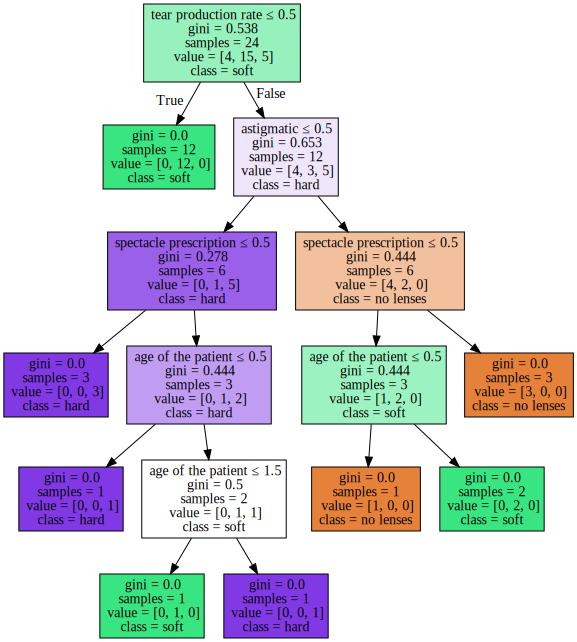

In [33]:
classnames=set_index(labels)
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=5, feature_names=attributes,\
                                class_names=classnames,label='all',filled=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## Prediction: Classifying New Instances Using a Decision Tree Classifier##

The cell below classifies new instances with the decision tree you created.

When you are prompted to input test set, please input one entry each time and separate each value with a comma. Also, please make sure the input are numbers instead of strings. When your input is strings, please encode them manually according to the codebook printed above.

In [35]:
testset=input('Please Enter Your Test Set:')
testset=np.array(testset.split(',')).reshape(1, -1)
predictions=clf.predict(testset)

Please Enter Your Test Set:0,0,1,1


In [36]:
print(predictions)

['hard']


## Evaluating the Accuracy of a Decision Tree Classifier##

The following cell will run cross-validation to evaluate your decision tree classifier.  It will ask you for your test data, and the number of folds that you want to use.

In [39]:
dataset=input('Please Enter Your Test Data:')
n_foldCV=int(input("Please Enter the Number of Folds:"))
attributes,instances,labels=loadDataSet(dataset)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(instances,labels)
scores = cross_val_score(clf, instances, labels, cv=n_foldCV)

Please Enter Your Test Data:./Dataset/iris.data
Please Enter the Number of Folds:10


The following cell will output the accuracy score in each run and the accuracy estimate of the model under 95% confidence interval.

In [40]:
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  0.93333333  1.          1.        ]
Accuracy: 0.95 (+/- 0.09)


Now you can print this notebook as a PDF file and turn it in.